# Boston House Prices

https://www.kaggle.com/vikrishnan/boston-house-prices?select=housing.csv

Each record in the database describes a Boston suburb or town. The attributes are deﬁned as follows:
- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to ﬁve Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per 10,000
- PTRATIO: pupil-teacher ratio by town 
- B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 
- LSTAT: % lower status of the population
- MEDV: Median value of owner-occupied homes in 1000s

### Data Preprocessing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Housing.csv', header=None, prefix="var")
dataset.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
dataset.shape

(506, 15)

In [4]:
# Split into input and output values
X = dataset.iloc[:, 1:-1]
y = dataset.iloc[:, -1]

In [5]:
X

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### Feature Scaling

In [7]:
# In ANN neuron wights get multiplied with input, so it is necessary to scale the inputs to a common scale.
# Also it helps in easier multiplication as I/Ps are scaled down
# It also helps in back propogation as derivatives can be easily found with smaller values.
# As a result, convergence will happen quickly.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(354, 13) (152, 13) (354,) (152,)


### Artificial Neural Network

I have defined a simple model with two hidden layers and an output layer that predicts a numeric value. I will use the ReLU activation function and “he” weight initialization, which are a good practice.

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [9]:
model = Sequential()
model.add(Dense(20, kernel_initializer='he_normal', activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(5, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(1))

In [10]:
# Compile the model and specify loss and optimizer
opt = Adam(learning_rate=0.01, beta_1=0.85, beta_2=0.999)
model.compile(optimizer=opt, loss='mse', metrics='mean_absolute_error')

In [11]:
# Fit the model on the training dataset
model_history=model.fit(X_train, y_train,validation_split=0.30, epochs=250, batch_size=10)

Epoch 1/250
25/25 [==============================] - 1s 17ms/step - loss: 476.4538 - mean_absolute_error: 20.2545 - val_loss: 169.7067 - val_mean_absolute_error: 11.1107
Epoch 2/250
25/25 [==============================] - 0s 3ms/step - loss: 91.0021 - mean_absolute_error: 7.6334 - val_loss: 25.3908 - val_mean_absolute_error: 3.9122
Epoch 3/250
25/25 [==============================] - 0s 2ms/step - loss: 21.5422 - mean_absolute_error: 3.4671 - val_loss: 20.2255 - val_mean_absolute_error: 3.4992
Epoch 4/250
25/25 [==============================] - 0s 3ms/step - loss: 16.0186 - mean_absolute_error: 3.1400 - val_loss: 16.3906 - val_mean_absolute_error: 3.1224
Epoch 5/250
25/25 [==============================] - 0s 3ms/step - loss: 11.9137 - mean_absolute_error: 2.6251 - val_loss: 15.9800 - val_mean_absolute_error: 3.0591
Epoch 6/250
25/25 [==============================] - 0s 3ms/step - loss: 13.9583 - mean_absolute_error: 2.8414 - val_loss: 14.5377 - val_mean_absolute_error: 2.8326
Epoch

25/25 [==============================] - 0s 2ms/step - loss: 5.2943 - mean_absolute_error: 1.8257 - val_loss: 12.6226 - val_mean_absolute_error: 2.4202
Epoch 51/250
25/25 [==============================] - 0s 2ms/step - loss: 5.1409 - mean_absolute_error: 1.7532 - val_loss: 13.1911 - val_mean_absolute_error: 2.5447
Epoch 52/250
25/25 [==============================] - 0s 2ms/step - loss: 4.8071 - mean_absolute_error: 1.6474 - val_loss: 15.1571 - val_mean_absolute_error: 2.7221
Epoch 53/250
25/25 [==============================] - 0s 3ms/step - loss: 5.4996 - mean_absolute_error: 1.7629 - val_loss: 13.4538 - val_mean_absolute_error: 2.5860
Epoch 54/250
25/25 [==============================] - 0s 2ms/step - loss: 5.7400 - mean_absolute_error: 1.7435 - val_loss: 13.2961 - val_mean_absolute_error: 2.5207
Epoch 55/250
25/25 [==============================] - 0s 3ms/step - loss: 5.3049 - mean_absolute_error: 1.6858 - val_loss: 14.5175 - val_mean_absolute_error: 2.5753
Epoch 56/250
25/25 [===

Epoch 100/250
25/25 [==============================] - 0s 3ms/step - loss: 3.2501 - mean_absolute_error: 1.3857 - val_loss: 12.8665 - val_mean_absolute_error: 2.4039
Epoch 101/250
25/25 [==============================] - 0s 2ms/step - loss: 2.9900 - mean_absolute_error: 1.3297 - val_loss: 13.6721 - val_mean_absolute_error: 2.5230
Epoch 102/250
25/25 [==============================] - 0s 3ms/step - loss: 3.7609 - mean_absolute_error: 1.4798 - val_loss: 13.6034 - val_mean_absolute_error: 2.4536
Epoch 103/250
25/25 [==============================] - 0s 3ms/step - loss: 3.2725 - mean_absolute_error: 1.4044 - val_loss: 15.7385 - val_mean_absolute_error: 2.7393
Epoch 104/250
25/25 [==============================] - 0s 2ms/step - loss: 4.0587 - mean_absolute_error: 1.5798 - val_loss: 13.2133 - val_mean_absolute_error: 2.5054
Epoch 105/250
25/25 [==============================] - 0s 2ms/step - loss: 3.0284 - mean_absolute_error: 1.3216 - val_loss: 13.8562 - val_mean_absolute_error: 2.3930
Epoc

25/25 [==============================] - 0s 3ms/step - loss: 3.0207 - mean_absolute_error: 1.3240 - val_loss: 13.9614 - val_mean_absolute_error: 2.5630
Epoch 150/250
25/25 [==============================] - 0s 2ms/step - loss: 3.6666 - mean_absolute_error: 1.4726 - val_loss: 12.3889 - val_mean_absolute_error: 2.3899
Epoch 151/250
25/25 [==============================] - 0s 2ms/step - loss: 3.2040 - mean_absolute_error: 1.3613 - val_loss: 12.0879 - val_mean_absolute_error: 2.3049
Epoch 152/250
25/25 [==============================] - 0s 3ms/step - loss: 2.8794 - mean_absolute_error: 1.2580 - val_loss: 12.9271 - val_mean_absolute_error: 2.3370
Epoch 153/250
25/25 [==============================] - 0s 2ms/step - loss: 2.8289 - mean_absolute_error: 1.2693 - val_loss: 12.3157 - val_mean_absolute_error: 2.2856
Epoch 154/250
25/25 [==============================] - 0s 2ms/step - loss: 3.2261 - mean_absolute_error: 1.3685 - val_loss: 11.9212 - val_mean_absolute_error: 2.2490
Epoch 155/250
25/2

Epoch 198/250
25/25 [==============================] - 0s 2ms/step - loss: 2.8954 - mean_absolute_error: 1.2646 - val_loss: 13.6504 - val_mean_absolute_error: 2.4706
Epoch 199/250
25/25 [==============================] - 0s 2ms/step - loss: 2.5518 - mean_absolute_error: 1.1682 - val_loss: 12.6672 - val_mean_absolute_error: 2.3486
Epoch 200/250
25/25 [==============================] - 0s 2ms/step - loss: 2.4587 - mean_absolute_error: 1.2088 - val_loss: 11.7360 - val_mean_absolute_error: 2.2932
Epoch 201/250
25/25 [==============================] - 0s 2ms/step - loss: 2.1753 - mean_absolute_error: 1.1662 - val_loss: 11.4310 - val_mean_absolute_error: 2.2178
Epoch 202/250
25/25 [==============================] - 0s 3ms/step - loss: 1.9181 - mean_absolute_error: 0.9826 - val_loss: 12.1844 - val_mean_absolute_error: 2.2708
Epoch 203/250
25/25 [==============================] - 0s 2ms/step - loss: 1.8750 - mean_absolute_error: 1.0509 - val_loss: 12.7542 - val_mean_absolute_error: 2.3387
Epoc

25/25 [==============================] - 0s 2ms/step - loss: 1.6909 - mean_absolute_error: 0.9799 - val_loss: 13.7617 - val_mean_absolute_error: 2.3602
Epoch 248/250
25/25 [==============================] - 0s 2ms/step - loss: 1.8861 - mean_absolute_error: 1.0716 - val_loss: 12.3189 - val_mean_absolute_error: 2.3680
Epoch 249/250
25/25 [==============================] - 0s 3ms/step - loss: 2.3342 - mean_absolute_error: 1.1735 - val_loss: 13.8817 - val_mean_absolute_error: 2.4500
Epoch 250/250
25/25 [==============================] - 0s 3ms/step - loss: 1.7622 - mean_absolute_error: 1.0188 - val_loss: 13.1808 - val_mean_absolute_error: 2.3048


In [12]:
print(model_history.history.keys())

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


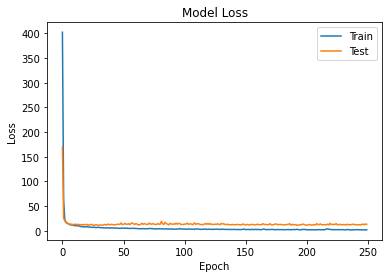

In [13]:
# Summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

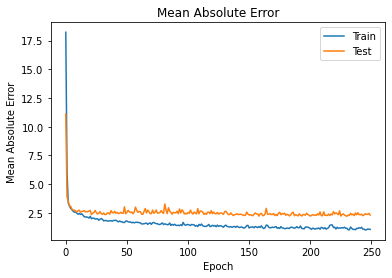

In [14]:
# Summarize history for mean absolute error
plt.plot(model_history.history['mean_absolute_error'])
plt.plot(model_history.history['val_mean_absolute_error'])
plt.title('Mean Absolute Error')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [15]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [16]:
# Calculate the average error in the predictions
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print('MAE: %.3f' % mae)

MAE: 2.972
